In [1]:
import pandas as pd
import numpy as np
import json
import pymysql
import getpass
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn = pymysql.connect(host="localhost",
                       port=3306,
                       user="root",
                       password=getpass.getpass(),
                       db="olist"
                      )

········


In [3]:
### How many Sellers is there:

In [4]:
sellers_query = """
SELECT DISTINCT
    oi.seller_id
FROM olist.order_items oi
    INNER JOIN olist.orders o
    ON oi.order_id = o.order_id
"""

In [5]:
sellers = pd.read_sql(sellers_query, conn)

In [6]:
sellers.shape

(3095, 1)

In [7]:
### HOW MUCH DID THEY SELL

In [8]:
seller_qty = """
SELECT 
    oi.seller_id,
    count(*) as qty
FROM olist.order_items oi
    INNER JOIN olist.orders o
    ON oi.order_id = o.order_id
GROUP BY oi.seller_id
"""

In [9]:
qty = pd.read_sql(seller_qty, conn)

In [10]:
qty.describe()

,qty
count,3095.000000
mean,36.397415
std,119.193461
min,1.000000
25%,2.000000
50%,8.000000
75%,24.000000
max,2033.000000


In [11]:
seller_rev = """
SELECT 
    oi.seller_id,
    count(*) as quantity,
    sum(oi.price) as revenue
FROM olist.order_items oi
    INNER JOIN olist.orders o
    ON oi.order_id = o.order_id
GROUP BY oi.seller_id
"""

In [12]:
rev = pd.read_sql(seller_rev, conn)

In [13]:
rev


,seller_id,quantity,revenue
0,3504c0cb71d7fa48d967e0e4c94d59d9,53,2349.940056
1,289cdb325fb7e7f891c38608bf9e0962,126,13544.950102
2,4869f7a5dfa277a7dca6462dcf3b52b2,1156,229472.628349
3,66922902710d126a0e7d26b0e3805106,156,14362.300011
4,2c9e548be18521d1c43cde1c582c6de8,174,6109.440094
...,...,...,...
3090,babcc0ab201e4c60188427cae51a5b8b,1,79.000000
3091,8501d82f68d23148b6d78bb7c4a42037,1,19.700001
3092,d263fa444c1504a75cbca5cc465f592a,1,399.000000
3093,edf3fabebcc20f7463cc9c53da932ea8,1,219.899994


In [14]:
rev.describe()

,quantity,revenue
count,3095.000000,3095.000000
mean,36.397415,4391.484233
std,119.193461,13921.997191
min,1.000000,3.500000
25%,2.000000,208.849998
50%,8.000000,821.479998
75%,24.000000,3280.830006
max,2033.000000,229472.628349


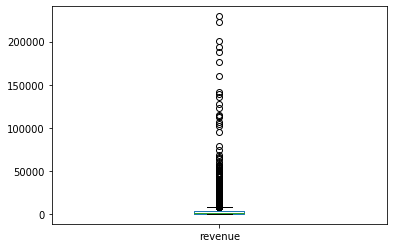

In [15]:
rev.revenue.plot(kind="box")

In [16]:
top_sellers = (rev
               .sort_values("revenue", ascending=False)
               .reset_index(drop=True)
              )
top_sellers

,seller_id,quantity,revenue
0,4869f7a5dfa277a7dca6462dcf3b52b2,1156,229472.628349
1,53243585a1d6dc2643021fd1853d8905,410,222776.049545
2,4a3ca9315b744ce9f8e9374361493884,1987,200472.921459
3,fa1c13f2614d7b5c4749cbc52fecda94,586,194042.029396
4,7c67e1448b00f6e969d365cea6b010ab,1364,187923.891939
...,...,...,...
3090,34aefe746cd81b7f3b23253ea28bef39,1,8.000000
3091,702835e4b785b67a084280efca355756,1,7.600000
3092,1fa2d3def6adfa70e58c276bb64fe5bb,1,6.900000
3093,77128dec4bec4878c37ab7d6169d6f26,1,6.500000


In [17]:
top_sellers = top_sellers.drop(columns = "quantity")

In [18]:
top_sellers = (top_sellers
                        .assign(rank=top_sellers.index + 1)
                        .assign(cum_rev=top_sellers.revenue.cumsum())

                        )

In [34]:
top_sellers = (top_sellers
                        .assign(percentile =((1-(top_sellers["rank"] / len(top_sellers)))*100).astype(int))
                        .assign(rev_percentile=((top_sellers.cum_rev / top_sellers.revenue.sum() * 100 ).astype(int)))
                        .drop(columns="percentiles"))

In [35]:
top_sellers.head(40)

,seller_id,revenue,rank,cum_rev,rev_percentile,percentile
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.628349,1,2.294726e+05,1,99
1,53243585a1d6dc2643021fd1853d8905,222776.049545,2,4.522487e+05,3,99
2,4a3ca9315b744ce9f8e9374361493884,200472.921459,3,6.527216e+05,4,99
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.029396,4,8.467636e+05,6,99
4,7c67e1448b00f6e969d365cea6b010ab,187923.891939,5,1.034688e+06,7,99
5,7e93a43ef30c4f03f38b393420bc753a,176431.869331,6,1.211119e+06,8,99
6,da8622b14eb17ae2831f4ac5b9dab84a,160236.568089,7,1.371356e+06,10,99
7,7a67c85e85bb2ce8582c35f2203ad736,141745.531660,8,1.513101e+06,11,99
8,1025f0e2d44d7041d6cf58b6550e0bfa,138968.550537,9,1.652070e+06,12,99
9,955fee9216a65b617aa5c0531780ce60,135171.700697,10,1.787242e+06,13,99
